## Bike Riders Demand, Performance and Operational Analysis

Find the dataset at:
Koustav Das. (2025). Urban Bike Rider Operational Metrics (India, 2025) [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/8801753

This dataset captures daily operational data of bike-taxi riders across few Indian metro cities, namely Kolkata, Bengaluru, Mumbai, Chennai, Hyderabad, and Delhi. It provides a detailed record for 500 riders across these cities for the months of April, 2025 to August, 2025, covering their ride volumes, travel distances, earnings, fuel consumption, surge pricing, time efficiency, punctuality, and behavioural indicators such as idle time and customer rating.

### Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Data Extraction

In [2]:
cwd = os.getcwd()
FILE = os.path.join(cwd, "..", "Assets", "BikeRidersInfoSheet.csv")
df = pd.read_csv(FILE)

In [3]:
df.head(5)

,rider_id,date,location,rides,on_time_rides,cancelled_rides,missed_rides,distance_km,overhead_distance_km,earnings,peak_bonus,waiting_earnings,fuel_cost,idle_minutes,work_hours,customer_rating,avg_speed_kmph,network_downtime
0,R604EM,2025-04-01,Mumbai,10,8,2,3,48.66,2.95,468.05,0,8.63,123.93,39,3.45,4.68,25.24,5
1,R530DY,2025-04-01,Kolkata,16,13,3,2,75.22,3.61,745.59,80,30.08,194.20,40,5.75,4.80,23.47,6
2,R280VJ,2025-04-01,Chennai,8,5,0,2,37.62,2.57,360.45,0,8.08,93.32,36,2.72,4.15,26.72,6
3,R172ZA,2025-04-01,Kolkata,15,10,2,2,76.95,20.19,717.79,80,20.27,196.73,55,6.91,4.16,20.96,6
4,R409QX,2025-04-01,Mumbai,16,14,2,1,67.06,6.70,699.77,80,22.50,146.64,78,6.69,4.87,21.58,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76500 entries, 0 to 76499
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              76500 non-null  object 
 1   date                  76500 non-null  object 
 2   location              76500 non-null  object 
 3   rides                 76500 non-null  int64  
 4   on_time_rides         76500 non-null  int64  
 5   cancelled_rides       76500 non-null  int64  
 6   missed_rides          76500 non-null  int64  
 7   distance_km           76500 non-null  float64
 8   overhead_distance_km  76500 non-null  float64
 9   earnings              76500 non-null  float64
 10  peak_bonus            76500 non-null  int64  
 11  waiting_earnings      76500 non-null  float64
 12  fuel_cost             76500 non-null  float64
 13  idle_minutes          76500 non-null  int64  
 14  work_hours            76500 non-null  float64
 15  customer_rating    

### Data Pre-processing

In [5]:
np.sum(df.isna())

c:\Users\conta\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


rider_id                0
date                    0
location                0
rides                   0
on_time_rides           0
cancelled_rides         0
missed_rides            0
distance_km             0
overhead_distance_km    0
earnings                0
peak_bonus              0
waiting_earnings        0
fuel_cost               0
idle_minutes            0
work_hours              0
customer_rating         0
avg_speed_kmph          0
network_downtime        0
dtype: int64

In [6]:
df = df.dropna()

### Understanding The Data

In [7]:
df.columns

Index(['rider_id', 'date', 'location', 'rides', 'on_time_rides',
       'cancelled_rides', 'missed_rides', 'distance_km',
       'overhead_distance_km', 'earnings', 'peak_bonus', 'waiting_earnings',
       'fuel_cost', 'idle_minutes', 'work_hours', 'customer_rating',
       'avg_speed_kmph', 'network_downtime'],
      dtype='object')

In [8]:
def statisticalDetails(data):
    desc = data.describe()
    styled_describe = desc.style.format("{:.2f}").background_gradient(
        cmap="viridis", subset=pd.IndexSlice[desc.index.drop("count"), :]
    )
    return styled_describe

In [9]:
statisticalDetails(df)

,rides,on_time_rides,cancelled_rides,missed_rides,distance_km,overhead_distance_km,earnings,peak_bonus,waiting_earnings,fuel_cost,idle_minutes,work_hours,customer_rating,avg_speed_kmph,network_downtime
count,76500.00,76500.00,76500.00,76500.00,76500.00,76500.00,76500.00,76500.00,76500.00,76500.00,76500.00,76500.00,76500.00,76500.00,76500.00
mean,11.43,8.49,1.50,1.49,51.45,8.45,538.01,30.90,15.11,133.85,60.99,4.72,4.40,22.86,3.97
std,5.22,4.03,1.12,1.12,23.71,6.16,258.19,43.79,8.08,64.44,17.19,1.77,0.23,2.26,3.02
min,4.00,2.00,0.00,0.00,12.32,0.32,106.05,0.00,2.55,26.09,15.00,1.43,3.94,19.35,0.00
25%,8.00,5.00,1.00,0.00,33.57,3.81,345.87,0.00,9.18,85.80,47.00,3.41,4.20,20.87,2.00
50%,10.00,8.00,2.00,1.00,46.90,6.98,485.18,0.00,13.27,120.41,61.00,4.38,4.40,22.64,4.00
75%,14.00,11.00,3.00,2.00,63.74,11.54,671.45,80.00,19.06,167.04,76.00,5.64,4.60,24.72,6.00
max,34.00,29.00,3.00,3.00,161.51,47.52,1981.57,120.00,73.64,481.15,90.00,14.50,4.89,27.27,12.00


In [10]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [11]:
def getUniqueValues(*columnNames):
    """Unique values of all given columns"""
    for columnName in columnNames:
        unique_values = df[columnName].unique()
        unique_values_string = ", ".join(([str(val) for val in unique_values]))
        unique_count = len(unique_values)
        print(f"\nColumn: {columnName}")
        print(f"Unique Values: {unique_values_string}")
        print(f"Total Count: {unique_count}")

In [12]:
getUniqueValues(
    "location", "cancelled_rides", "missed_rides", "peak_bonus", "network_downtime"
)


Column: location
Unique Values: Mumbai, Kolkata, Chennai, Bangaluru, Hyderabad, Delhi
Total Count: 6

Column: cancelled_rides
Unique Values: 2, 3, 0, 1
Total Count: 4

Column: missed_rides
Unique Values: 3, 2, 1, 0
Total Count: 4

Column: peak_bonus
Unique Values: 0, 80, 100, 120
Total Count: 4

Column: network_downtime
Unique Values: 5, 6, 4, 3, 11, 2, 7, 8, 0, 1, 9, 12, 10
Total Count: 13


In [13]:
# Find start and end dates of the dataset
print("Earliest date:", df["date"].min())
print("Latest date:", df["date"].max())

Earliest date: 2025-04-01 00:00:00
Latest date: 2025-08-31 00:00:00


In [14]:
# Column aggregation based on "rider_id"
rider_features_grouped = (
    df.drop(columns=["date", "location", "customer_rating", "avg_speed_kmph"])
    .groupby("rider_id")
    .sum()
    .reset_index()
)

# Customer Rating & Average Speed as mean per rider
rider_features_grouped["customer_rating"] = (
    df.groupby("rider_id")["customer_rating"].mean().values.round(2)
)
rider_features_grouped["avg_speed_kmph"] = (
    df.groupby("rider_id")["avg_speed_kmph"].mean().values.round(2)
)

# Days worked as number of rows per rider
rider_features_grouped["days_worked"] = df.groupby("rider_id").size().values

# On-time ride percentage
rider_features_grouped["on_time_rides_percentage"] = (
    100 * rider_features_grouped["on_time_rides"] / rider_features_grouped["rides"]
).round(2)

rider_features_grouped["location"] = df.groupby("rider_id")["location"].first().values

# Net Earnings
rider_features_grouped["net_earnings"] = (
    rider_features_grouped["earnings"]
    + rider_features_grouped["peak_bonus"]
    + rider_features_grouped["waiting_earnings"]
    - rider_features_grouped["fuel_cost"]
).round(2)

# Productivity
rider_features_grouped["work_hours_per_day"] = (
    rider_features_grouped["work_hours"] / rider_features_grouped["days_worked"]
).round(2)

rider_features_grouped["rides_per_day"] = (
    rider_features_grouped["rides"] / rider_features_grouped["days_worked"]
).round(2)

rider_features_grouped["rides_per_hour"] = (
    rider_features_grouped["rides"] / rider_features_grouped["work_hours"]
).round(2)

# Efficiency
rider_features_grouped["idle_time_rate"] = (
    100 * rider_features_grouped["idle_minutes"] / (rider_features_grouped["work_hours"] * 60 + rider_features_grouped["idle_minutes"])
).round(2)

rider_features_grouped["overhead_distance_rate"] = 100 * rider_features_grouped["overhead_distance_km"] / (
    rider_features_grouped["distance_km"] + rider_features_grouped["overhead_distance_km"]
).round(2)

# Reliability
rider_features_grouped["cancel_rate"] = 100 * (
    rider_features_grouped["cancelled_rides"] / (rider_features_grouped["rides"] + rider_features_grouped["cancelled_rides"])
).round(2)

rider_features_grouped["miss_rate"] = 100 * rider_features_grouped["missed_rides"] / (
    rider_features_grouped["rides"] + rider_features_grouped["missed_rides"]
).round(2)

In [15]:
statisticalDetails(rider_features_grouped)

,rides,on_time_rides,cancelled_rides,missed_rides,distance_km,overhead_distance_km,earnings,peak_bonus,waiting_earnings,fuel_cost,idle_minutes,work_hours,network_downtime,customer_rating,avg_speed_kmph,days_worked,on_time_rides_percentage,net_earnings,work_hours_per_day,rides_per_day,rides_per_hour,idle_time_rate,overhead_distance_rate,cancel_rate,miss_rate
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,1749.31,1298.96,229.60,228.41,7872.45,1292.11,82315.65,4728.32,2311.22,20479.38,9331.82,722.24,606.70,4.40,22.86,153.00,74.26,68875.81,4.72,11.43,2.41,17.84,14.10,11.75,11.71
std,228.21,169.26,14.20,13.69,1027.93,179.51,11685.29,1591.41,303.13,3459.62,1011.49,70.22,217.21,0.02,0.18,0.00,0.82,11268.17,0.46,1.49,0.10,2.45,0.57,1.68,1.63
min,1037.00,754.00,186.00,189.00,4642.24,729.09,46840.60,500.00,1377.51,10037.00,5046.00,488.65,381.00,4.34,22.31,153.00,71.48,36503.28,3.19,6.78,2.06,8.72,12.22,8.00,7.75
25%,1617.75,1202.00,220.00,219.75,7270.28,1188.12,74829.14,3635.00,2122.93,18075.03,9420.25,683.00,453.00,4.38,22.73,153.00,73.69,60716.46,4.46,10.58,2.37,17.03,13.73,11.00,10.61
50%,1750.50,1301.00,230.00,228.00,7879.22,1286.12,82711.58,4530.00,2296.75,20330.01,9564.00,719.37,476.00,4.40,22.86,153.00,74.30,68828.20,4.70,11.44,2.41,18.07,14.08,12.00,11.61
75%,1913.50,1420.00,239.00,238.00,8618.30,1409.83,90983.80,5925.00,2529.38,22624.64,9704.00,775.13,884.75,4.41,22.98,153.00,74.79,77702.71,5.07,12.50,2.46,18.96,14.45,13.00,12.56
max,2558.00,1864.00,271.00,268.00,11514.26,1862.22,125127.47,9720.00,3353.85,32444.30,10093.00,940.23,1042.00,4.50,23.37,153.00,76.87,109592.78,6.15,16.72,2.76,24.61,15.61,20.00,18.89


### Exploratory Data Analysis (EDA)

In [16]:
def plot_rider_metrics(df, metric_col, n_top=15, title_suffix=""):
    """
    Generates two plots for a specified metric:
    1. Distribution of the metric across all riders (Histogram & Kernel Density Estimation).
    2. Comparison bar chart of the Top N riders by that metric.
    """

    # 1. Distribution Plot (Histogram & KDE)
    plt.figure(figsize=(10, 6))

    # Choose plot based on metric type
    if metric_col in ["customer_rating", "on_time_rides_percentage"]:
        # Use a density plot for ratings & on time ride %
        sns.histplot(df[metric_col], kde=True, bins=20, color="teal")
        plt.title(
            f'Distribution of Average Rider {metric_col.replace("_", " ").title()} {title_suffix}',
            fontsize=16,
        )
    else:
        # Use a histogram for count/sum metrics
        sns.histplot(df[metric_col], kde=True, bins=30, color="darkorange")
        plt.title(
            f'Distribution of Total Rider {metric_col.replace("_", " ").title()} {title_suffix}',
            fontsize=16,
        )

    plt.xlabel(metric_col.replace("_", " ").title(), fontsize=12)
    plt.ylabel("Number of Riders", fontsize=12)
    plt.show()

    # 2. Top N Comparison Bar Chart
    df_sorted = df.sort_values(by=metric_col, ascending=False).head(n_top)

    plt.figure(figsize=(12, 7))
    # Use a smooth bar plot with rider_id on the x-axis
    ax = sns.barplot(
        x="rider_id",
        y=metric_col,
        data=df_sorted,
        palette=sns.color_palette("rocket", n_top),
        edgecolor="black",
        linewidth=0.5,
    )

    plt.title(
        f'Top {n_top} Riders by Total {metric_col.replace("_", " ").title()} {title_suffix}',
        fontsize=16,
    )
    plt.xlabel("Rider ID", fontsize=12)
    plt.ylabel(f'Total {metric_col.replace("_", " ").title()}', fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=9)  # Rotate labels for readability

    # Add values on top of bars
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.0f}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 9),
            textcoords="offset points",
            fontsize=8,
        )

    plt.tight_layout()
    plt.show()

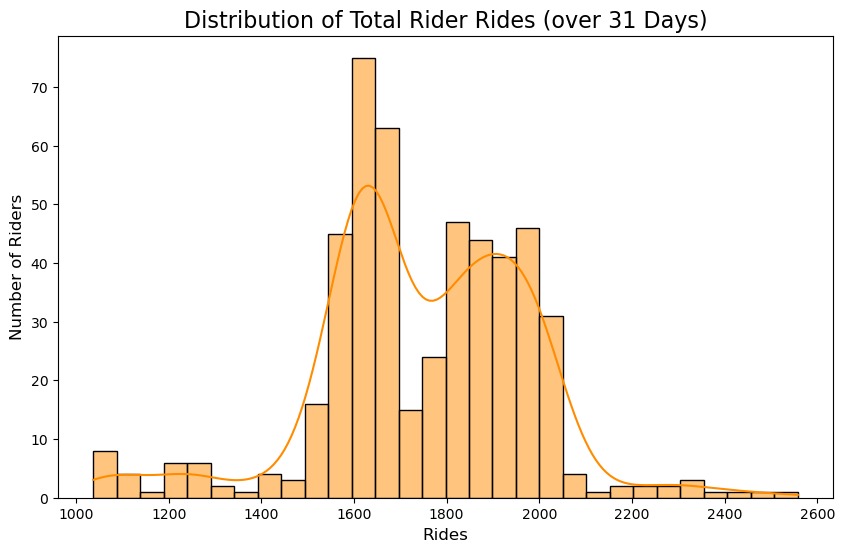

C:\Users\conta\AppData\Local\Temp\ipykernel_16712\3526375909.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


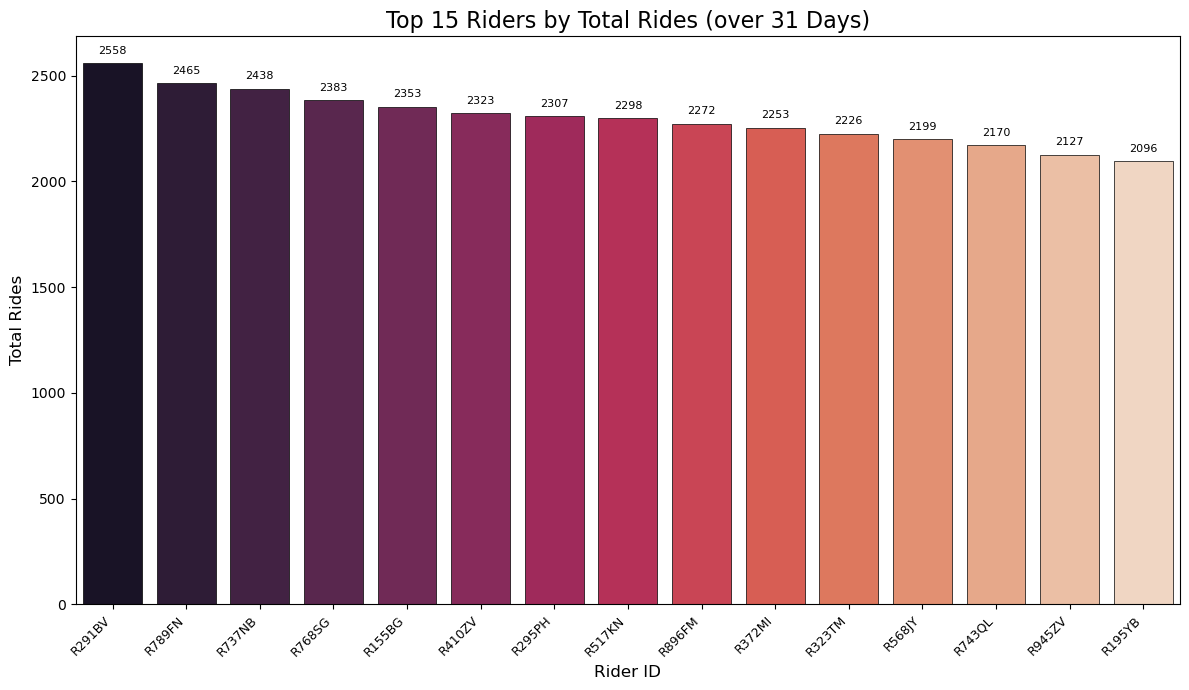

In [17]:
plot_rider_metrics(rider_features_grouped, metric_col="rides", title_suffix="(over 31 Days)")

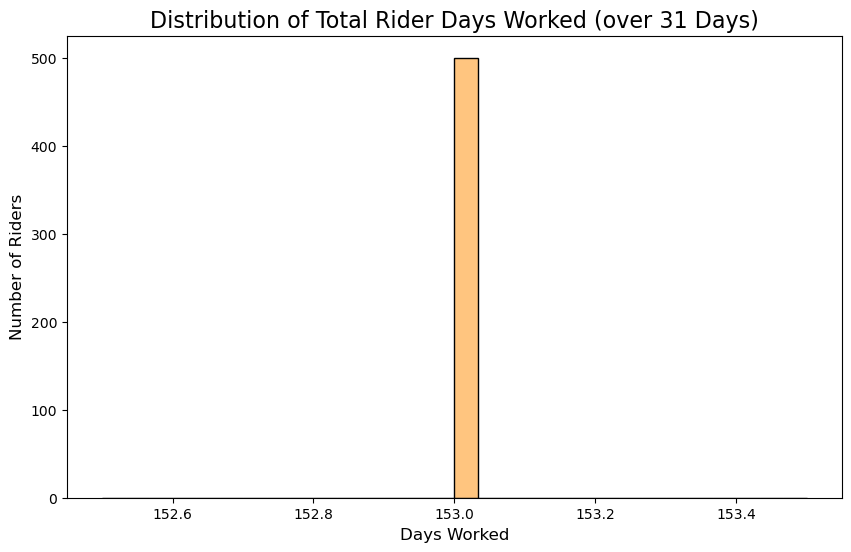

C:\Users\conta\AppData\Local\Temp\ipykernel_16712\3526375909.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


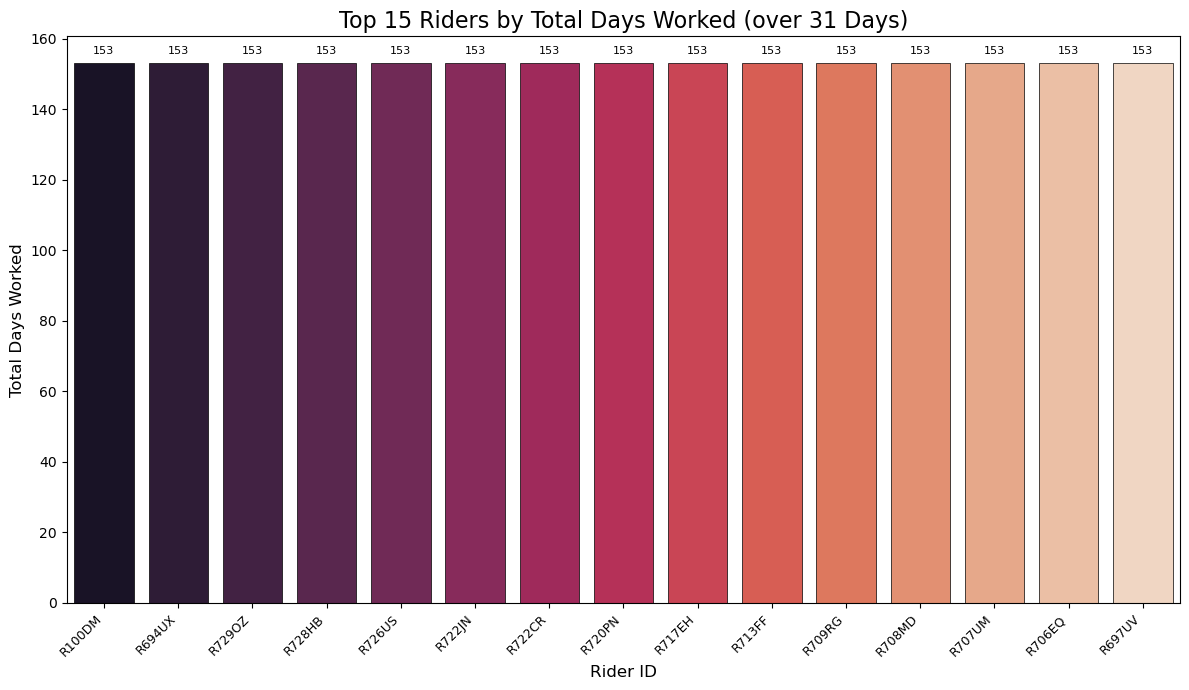

In [18]:
plot_rider_metrics(rider_features_grouped, metric_col="days_worked", title_suffix="(over 31 Days)")

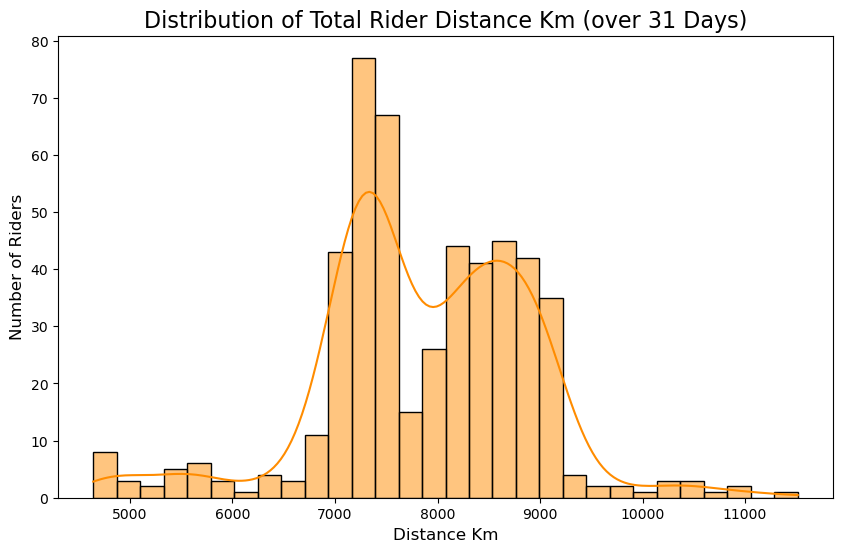

C:\Users\conta\AppData\Local\Temp\ipykernel_16712\3526375909.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


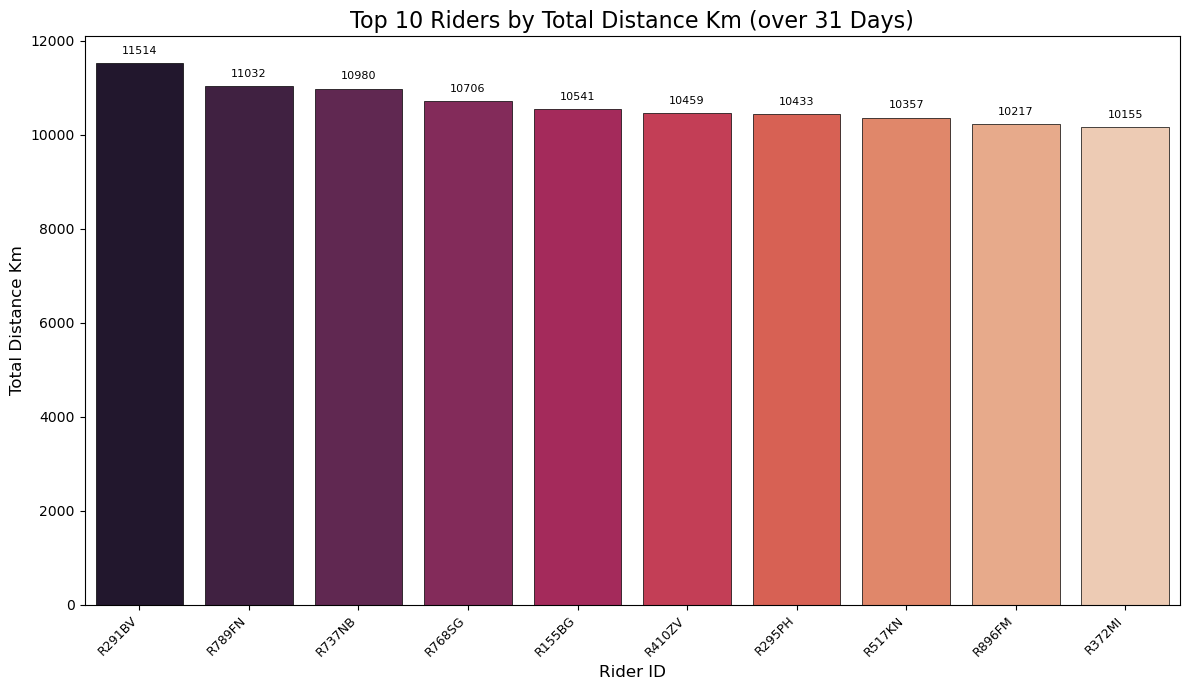

In [19]:
plot_rider_metrics(
    rider_features_grouped, metric_col="distance_km", title_suffix="(over 31 Days)", n_top=10
)

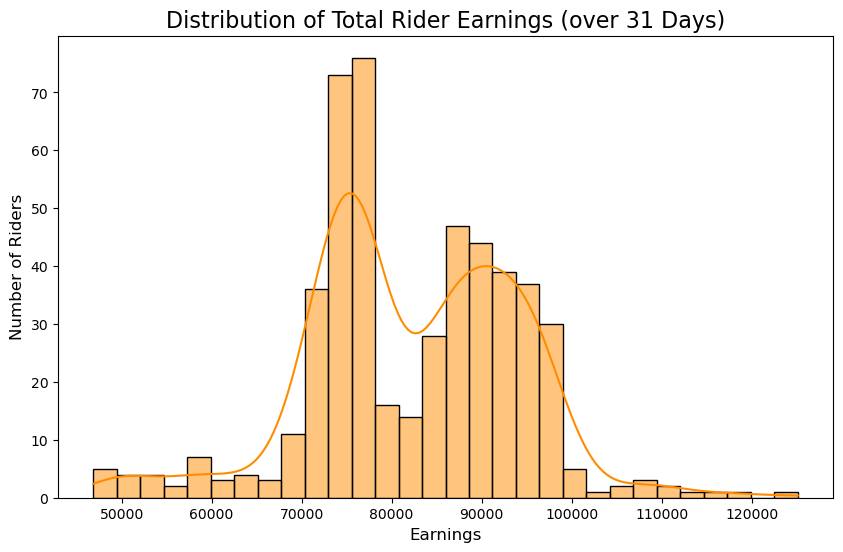

C:\Users\conta\AppData\Local\Temp\ipykernel_16712\3526375909.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


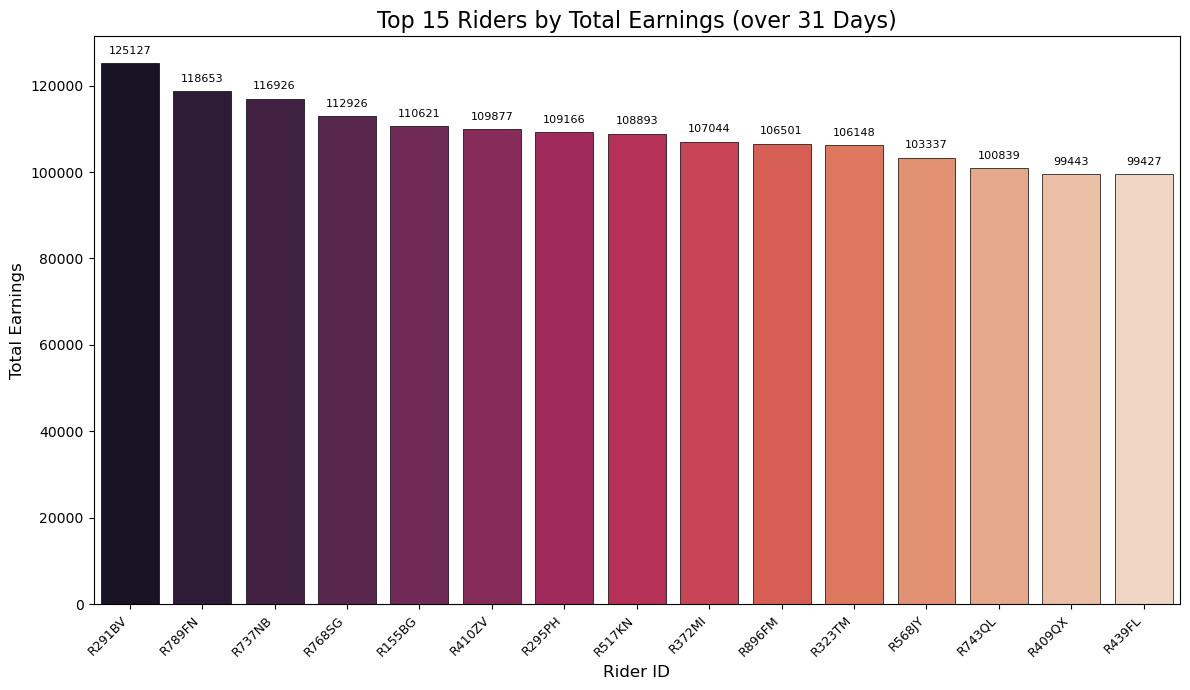

In [20]:
plot_rider_metrics(rider_features_grouped, metric_col="earnings", title_suffix="(over 31 Days)")

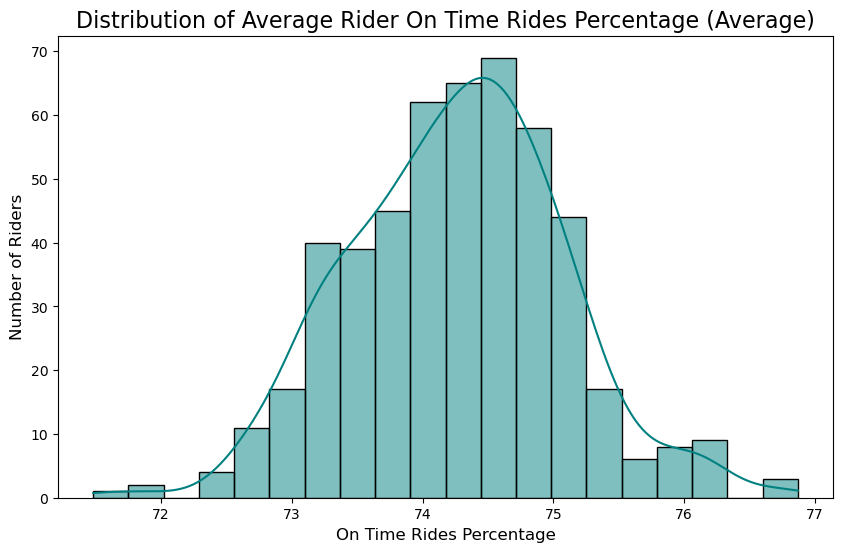

C:\Users\conta\AppData\Local\Temp\ipykernel_16712\3526375909.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


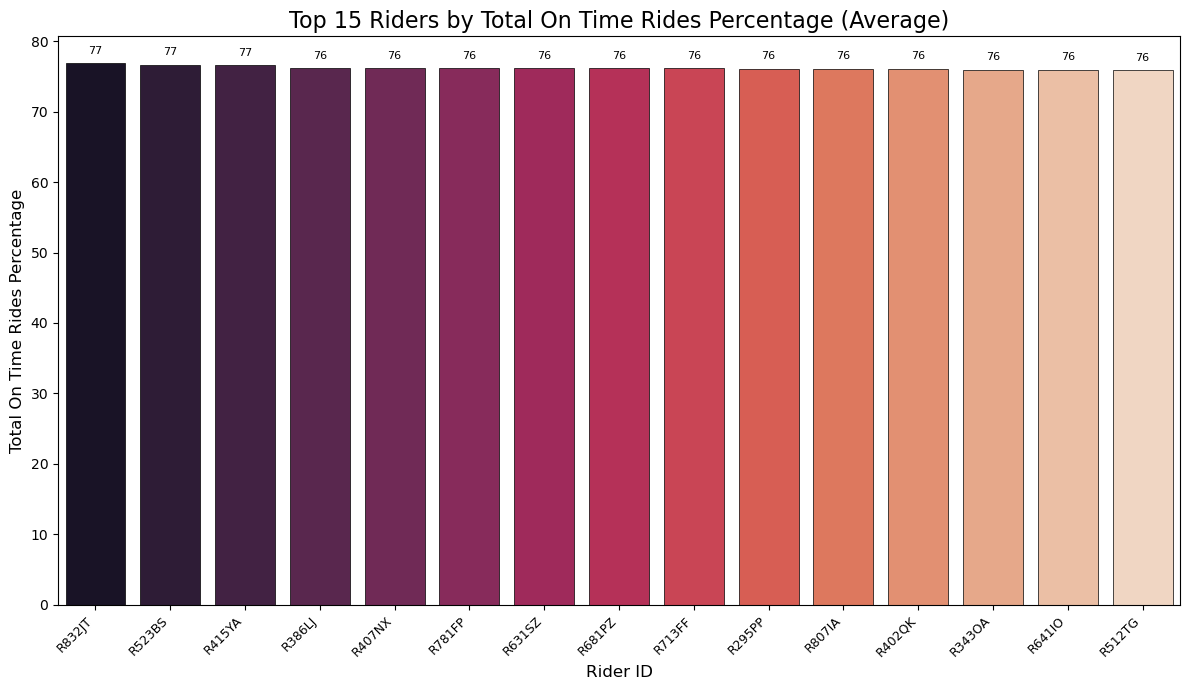

In [21]:
plot_rider_metrics(
    rider_features_grouped, metric_col="on_time_rides_percentage", title_suffix="(Average)"
)

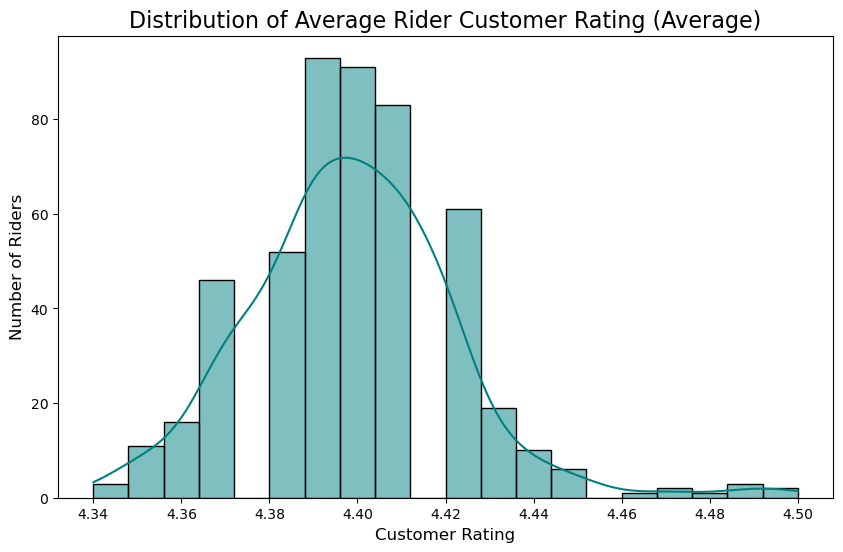

C:\Users\conta\AppData\Local\Temp\ipykernel_16712\3526375909.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


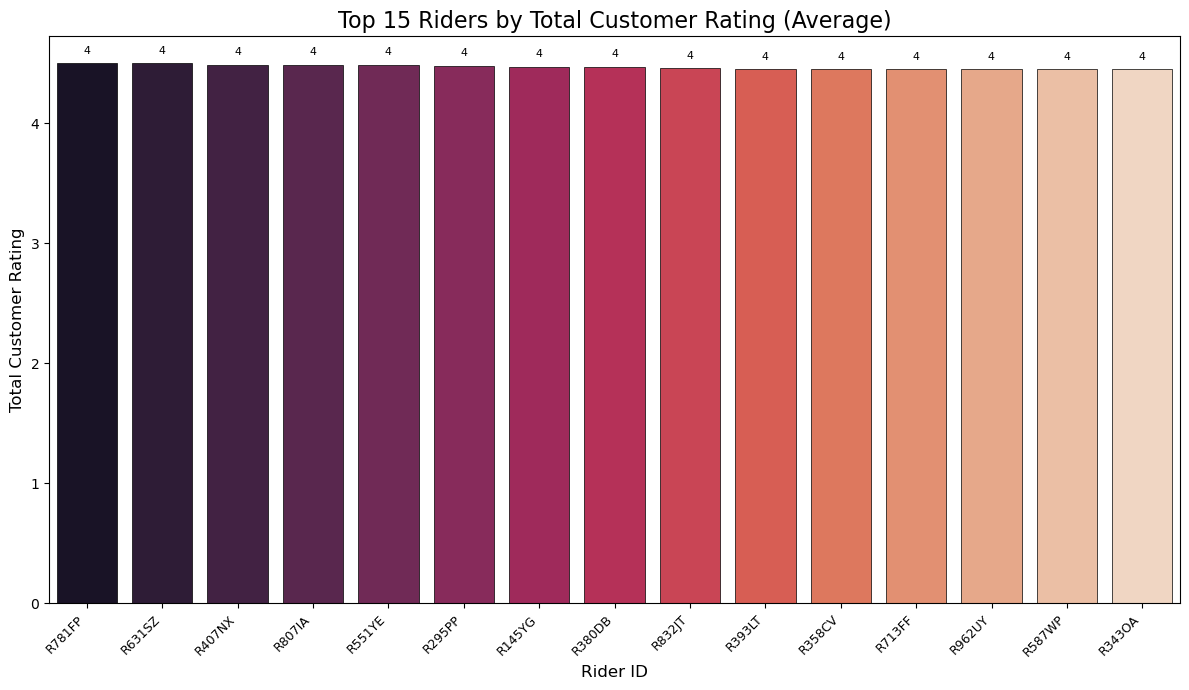

In [22]:
plot_rider_metrics(rider_features_grouped, metric_col="customer_rating", title_suffix="(Average)")

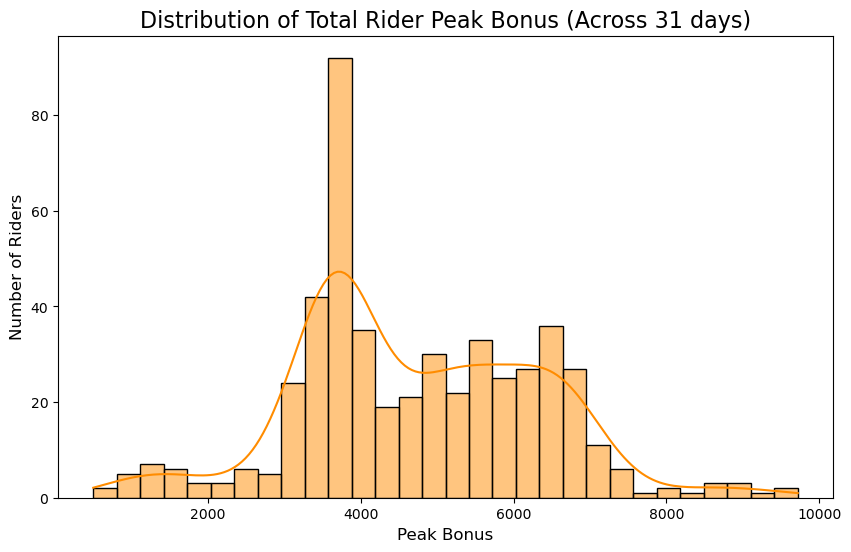

C:\Users\conta\AppData\Local\Temp\ipykernel_16712\3526375909.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


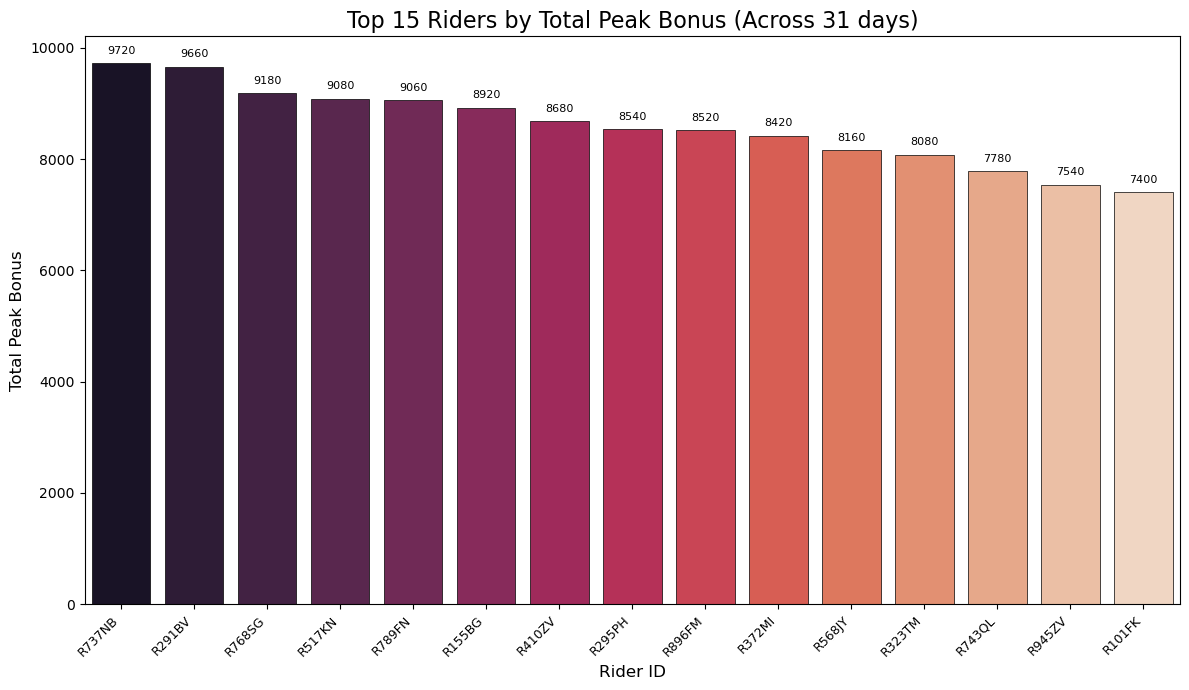

In [23]:
plot_rider_metrics(rider_features_grouped, metric_col="peak_bonus", title_suffix="(Across 31 days)")

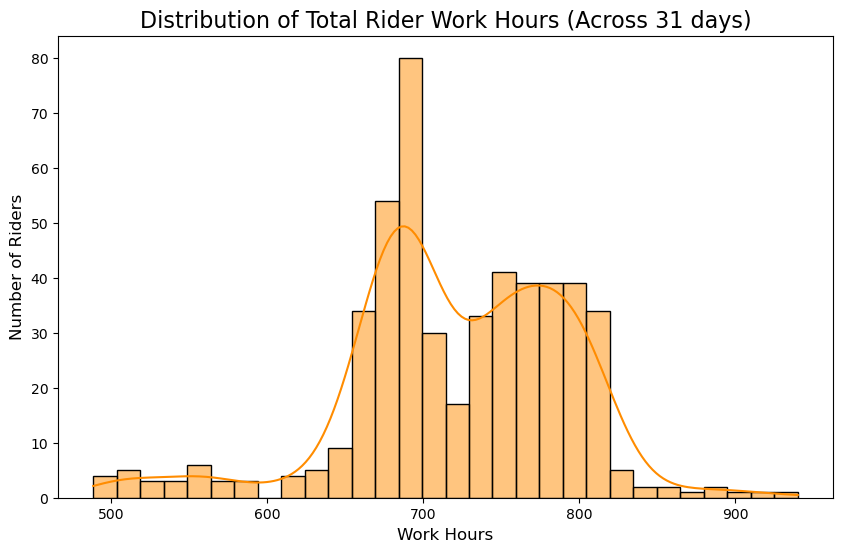

C:\Users\conta\AppData\Local\Temp\ipykernel_16712\3526375909.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


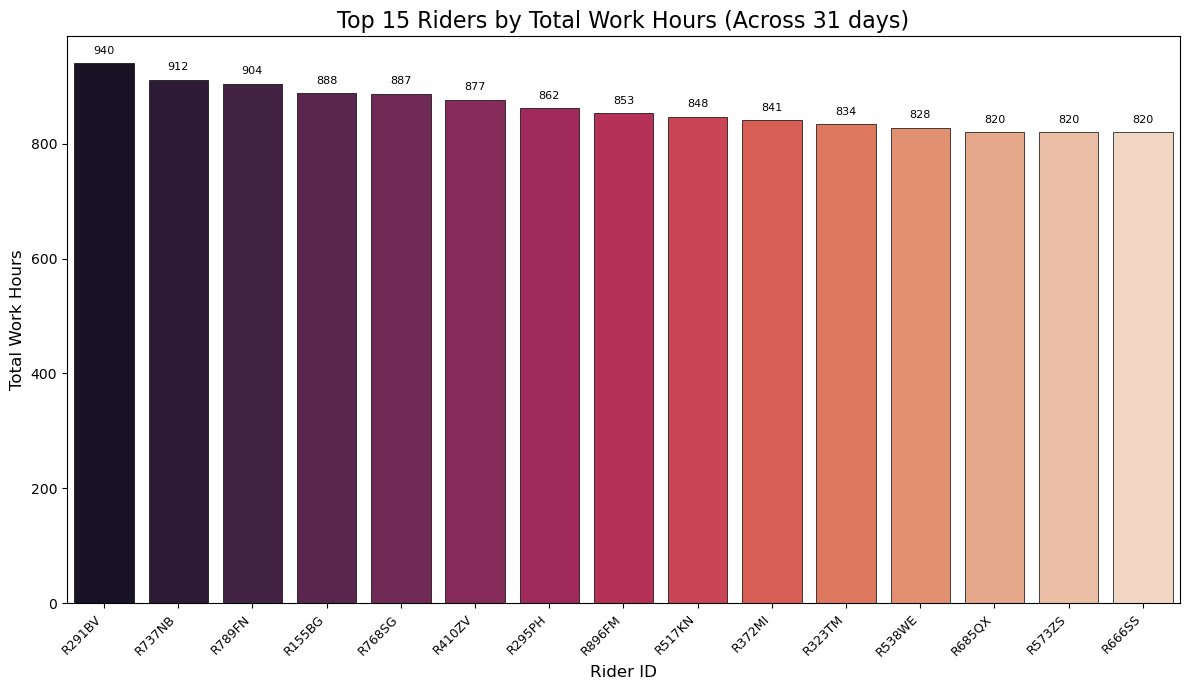

In [24]:
plot_rider_metrics(rider_features_grouped, metric_col="work_hours", title_suffix="(Across 31 days)")

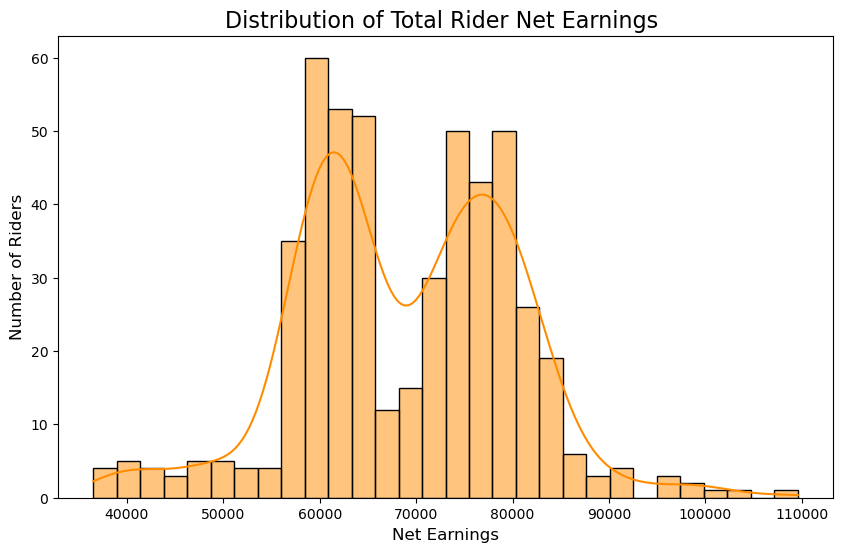

C:\Users\conta\AppData\Local\Temp\ipykernel_16712\3526375909.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


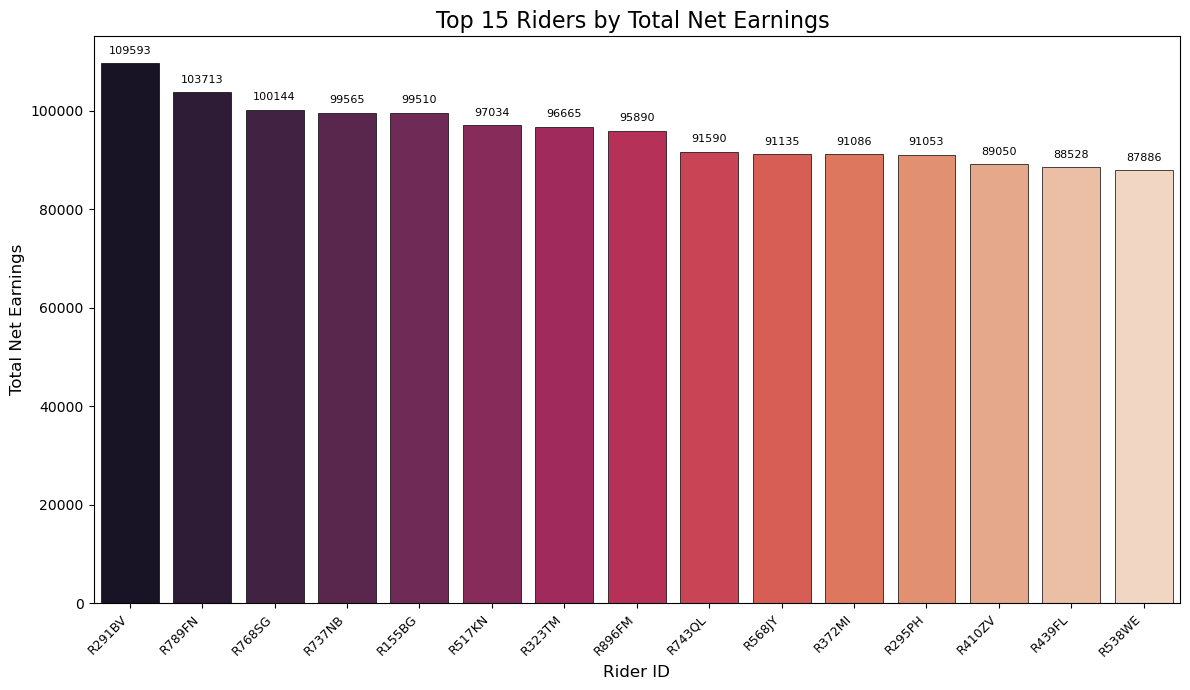

In [25]:
plot_rider_metrics(rider_features_grouped, "net_earnings")

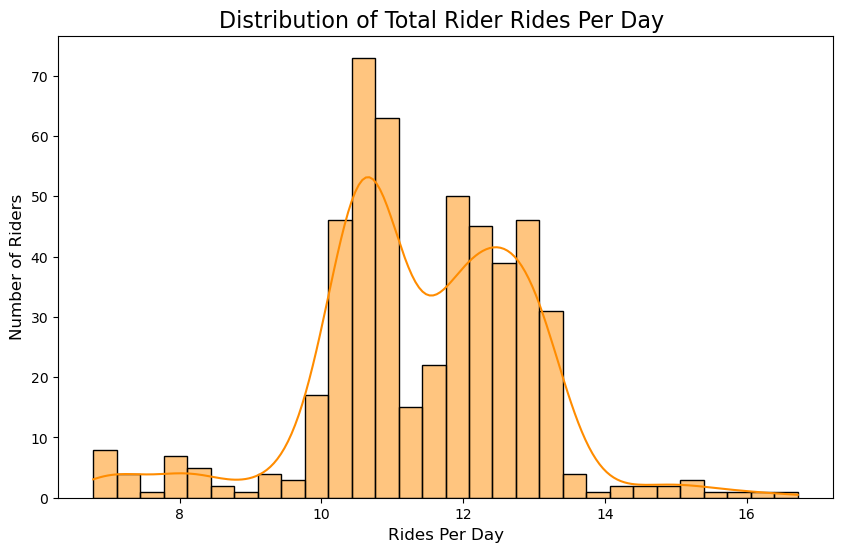

C:\Users\conta\AppData\Local\Temp\ipykernel_16712\3526375909.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


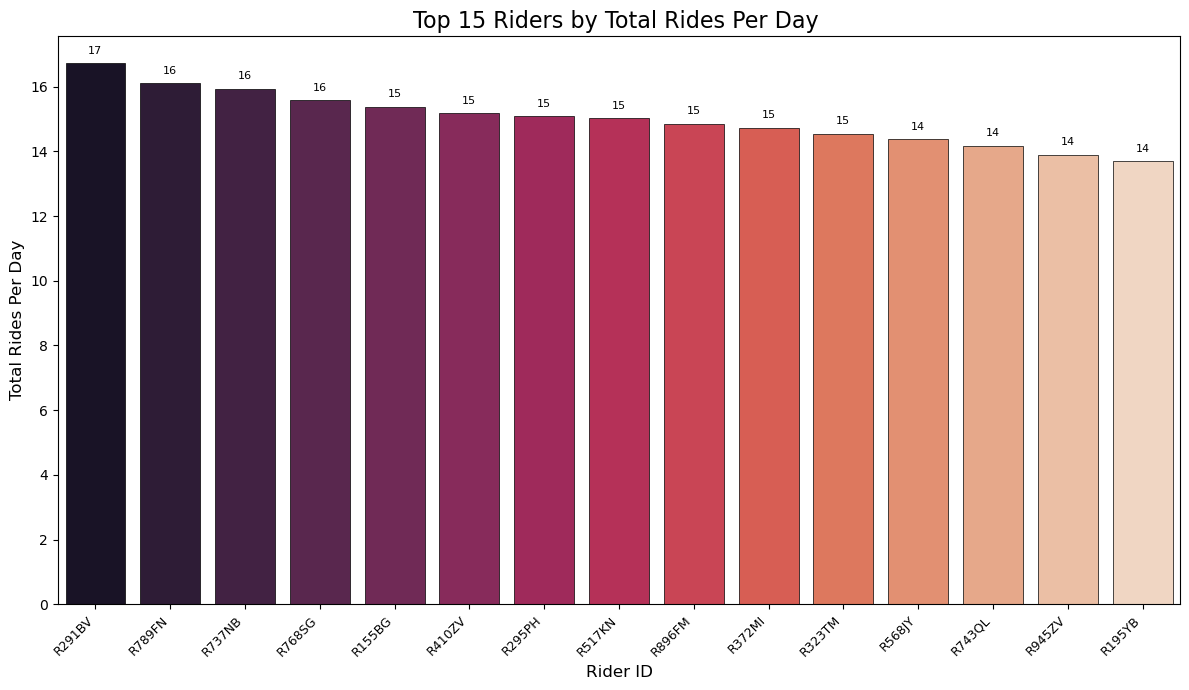

In [26]:
plot_rider_metrics(rider_features_grouped, "rides_per_day")

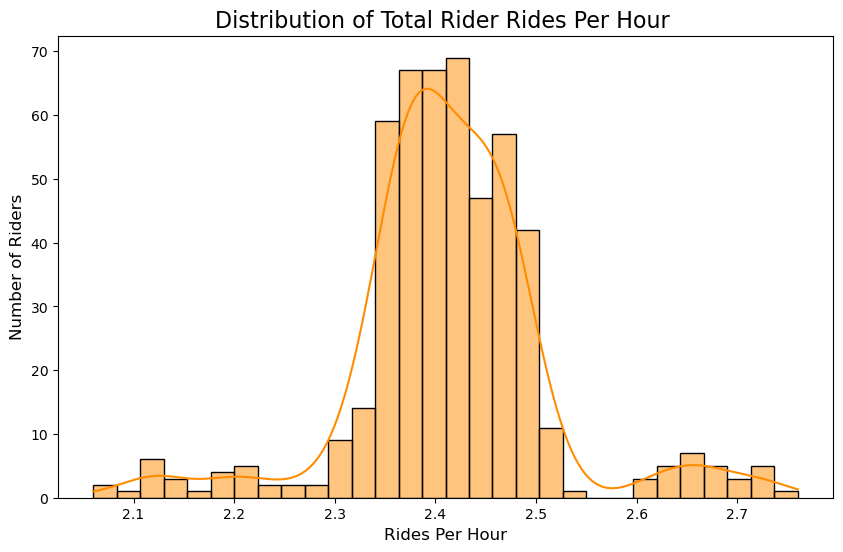

C:\Users\conta\AppData\Local\Temp\ipykernel_16712\3526375909.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


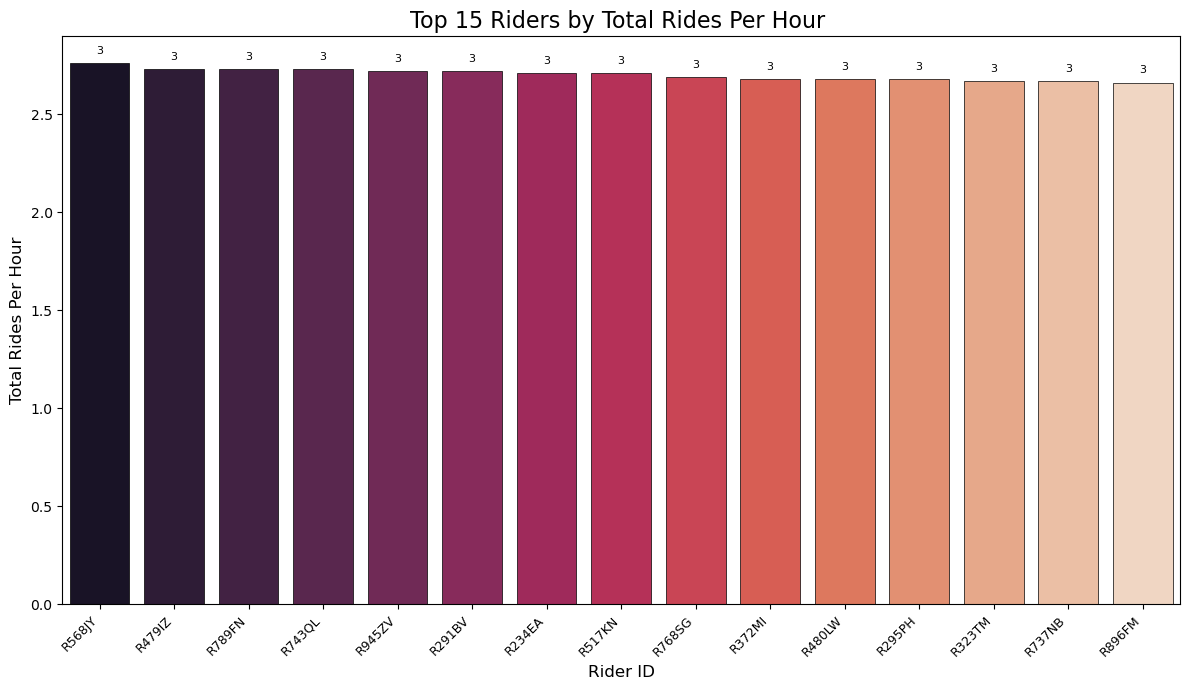

In [27]:
plot_rider_metrics(rider_features_grouped, "rides_per_hour")

### Week day & Month Wise Rider Analysis

In [28]:
# Extract week number and day of week
df["week"] = (df["date"].dt.isocalendar().week)
df["day_name"] = df["date"].dt.day_name()
df["month"] = df["date"].dt.month_name()

weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

In [29]:
weekly_daywise = (
    df.groupby(["week", "day_name"])[
        ["rides", "peak_bonus", "distance_km", "network_downtime"]
    ]
    .sum()
    .reset_index()
)

weekly_daywise_rides = weekly_daywise.pivot(
    index="week", columns="day_name", values="rides"
)

weekly_daywise_rides = weekly_daywise_rides[weekday_order]

print(
    tabulate(
        weekly_daywise_rides,
        headers="keys",
        tablefmt="fancy_grid",
        floatfmt=".0f",
        stralign="center",
    )
)

statisticalDetails(weekly_daywise_rides)

╒════════╤══════════╤═══════════╤═════════════╤════════════╤══════════╤════════════╤══════════╕
│   week │   Monday │   Tuesday │   Wednesday │   Thursday │   Friday │   Saturday │   Sunday │
╞════════╪══════════╪═══════════╪═════════════╪════════════╪══════════╪════════════╪══════════╡
│     14 │      nan │      5933 │        5564 │       5284 │     4988 │       7054 │     9959 │
├────────┼──────────┼───────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│     15 │     4825 │      4431 │        4337 │       8759 │     4348 │       6456 │     9304 │
├────────┼──────────┼───────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│     16 │     8965 │      8779 │        4464 │       4195 │     8771 │       6757 │     8996 │
├────────┼──────────┼───────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│     17 │     4403 │      4307 │        4151 │       4041 │     4359 │       7011 │     9037 │
├────────┼──────────┼───────────┼───────

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,21.00,22.00,22.00,22.00,22.00,22.00,22.00
mean,4733.43,4573.77,4741.95,4727.05,5152.14,6955.36,9088.59
std,1411.34,1010.18,1318.43,1473.47,1808.82,891.60,377.23
min,4062.00,4080.00,4045.00,4026.00,3989.00,6254.00,8610.00
25%,4157.00,4210.75,4139.75,4124.00,4191.75,6458.00,8748.25
50%,4243.00,4307.50,4318.00,4237.50,4356.50,6642.50,9016.50
75%,4403.00,4430.50,4510.75,4416.25,4648.50,6966.75,9315.25
max,8965.00,8779.00,8723.00,9623.00,9189.00,9383.00,9959.00


In [30]:
weekday_wise_rides = (
    df.groupby("day_name", as_index=False)[["rides", "earnings", "peak_bonus"]]
    .sum()
    .set_index("day_name")
)
weekday_wise_rides = weekday_wise_rides.sort_values(by=["rides", "earnings", "peak_bonus"], ascending=[False, False, False])
print(
    tabulate(
        weekday_wise_rides,
        headers="keys",
        tablefmt="fancy_grid",
        stralign="center",
    )
)

╒════════════╤═════════╤═════════════╤══════════════╕
│  day_name  │   rides │    earnings │   peak_bonus │
╞════════════╪═════════╪═════════════╪══════════════╡
│   Sunday   │  199949 │ 9.4134e+06  │       942500 │
├────────────┼─────────┼─────────────┼──────────────┤
│  Saturday  │  153018 │ 7.18929e+06 │       569440 │
├────────────┼─────────┼─────────────┼──────────────┤
│   Friday   │  113347 │ 5.34501e+06 │       236720 │
├────────────┼─────────┼─────────────┼──────────────┤
│ Wednesday  │  104323 │ 4.91723e+06 │       161820 │
├────────────┼─────────┼─────────────┼──────────────┤
│  Thursday  │  103995 │ 4.88392e+06 │       159180 │
├────────────┼─────────┼─────────────┼──────────────┤
│  Tuesday   │  100623 │ 4.72873e+06 │       138680 │
├────────────┼─────────┼─────────────┼──────────────┤
│   Monday   │   99402 │ 4.68025e+06 │       155820 │
╘════════════╧═════════╧═════════════╧══════════════╛


In [31]:
weekly_daywise_network_downtime = weekly_daywise.pivot(
    index="week", columns="day_name", values="network_downtime"
)

weekly_daywise_network_downtime = weekly_daywise_network_downtime[weekday_order]

print(
    tabulate(
        weekly_daywise_network_downtime,
        headers="keys",
        tablefmt="fancy_grid",
        floatfmt=".0f",
        stralign="center",
    )
)

statisticalDetails(weekly_daywise_network_downtime)

╒════════╤══════════╤═══════════╤═════════════╤════════════╤══════════╤════════════╤══════════╕
│   week │   Monday │   Tuesday │   Wednesday │   Thursday │   Friday │   Saturday │   Sunday │
╞════════╪══════════╪═══════════╪═════════════╪════════════╪══════════╪════════════╪══════════╡
│     14 │      nan │      2043 │        1990 │       1970 │     2030 │       1955 │     1982 │
├────────┼──────────┼───────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│     15 │     1978 │      1985 │        2020 │       1968 │     1994 │       2064 │     1986 │
├────────┼──────────┼───────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│     16 │     2015 │      1921 │        1931 │       1999 │     1922 │       1858 │     2014 │
├────────┼──────────┼───────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│     17 │     1845 │      1995 │        2072 │       1918 │     2051 │       1915 │     2129 │
├────────┼──────────┼───────────┼───────

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,21.00,22.00,22.00,22.00,22.00,22.00,22.00
mean,1980.10,1992.50,1978.64,1964.45,1981.32,1997.18,1984.45
std,63.52,58.58,57.57,46.90,50.37,65.75,78.52
min,1845.00,1886.00,1872.00,1878.00,1901.00,1858.00,1790.00
25%,1949.00,1955.50,1939.00,1925.75,1940.50,1957.75,1951.00
50%,1963.00,1994.00,1988.50,1969.00,1988.00,2004.50,1981.50
75%,2005.00,2039.50,2020.00,2002.75,2017.50,2042.75,2020.75
max,2135.00,2090.00,2072.00,2037.00,2093.00,2127.00,2129.00


In [32]:
weekly_daywise_peak_bonus = weekly_daywise.pivot(
    index="week", columns="day_name", values="peak_bonus"
)

weekly_daywise_peak_bonus = weekly_daywise_peak_bonus[weekday_order]

print(
    tabulate(
        weekly_daywise_peak_bonus,
        headers="keys",
        tablefmt="fancy_grid",
        floatfmt=".0f",
        stralign="center",
    )
)

statisticalDetails(weekly_daywise_peak_bonus)

╒════════╤══════════╤═══════════╤═════════════╤════════════╤══════════╤════════════╤══════════╕
│   week │   Monday │   Tuesday │   Wednesday │   Thursday │   Friday │   Saturday │   Sunday │
╞════════╪══════════╪═══════════╪═════════════╪════════════╪══════════╪════════════╪══════════╡
│     14 │      nan │     18900 │       15060 │      12280 │     9760 │      26780 │    47140 │
├────────┼──────────┼───────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│     15 │     8480 │      5500 │        4000 │      41400 │     4000 │      22200 │    44360 │
├────────┼──────────┼───────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│     16 │    42940 │     40620 │        4960 │       2880 │    41440 │      24580 │    42040 │
├────────┼──────────┼───────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│     17 │     4720 │      3540 │        2660 │       2240 │     4160 │      27920 │    43120 │
├────────┼──────────┼───────────┼───────

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,21.00,22.00,22.00,22.00,22.00,22.00,22.00
mean,7420.00,6303.64,7355.45,7235.45,10760.00,25883.64,42840.91
std,11746.65,8354.14,10911.90,11896.86,14991.73,7055.09,2126.89
min,2160.00,2400.00,2120.00,1760.00,1600.00,19080.00,39640.00
25%,2560.00,3270.00,2600.00,2325.00,2500.00,22220.00,40995.00
50%,3120.00,3970.00,3570.00,3160.00,4170.00,23440.00,42790.00
75%,4880.00,4955.00,4920.00,4380.00,6620.00,26230.00,44330.00
max,42940.00,40620.00,40560.00,45300.00,43900.00,43640.00,47140.00


In [33]:
weekly_daywise_distance = weekly_daywise.pivot(
    index="week", columns="day_name", values="distance_km"
)

weekly_daywise_distance = weekly_daywise_distance[weekday_order]

print(
    tabulate(
        weekly_daywise_distance,
        headers="keys",
        tablefmt="fancy_grid",
        floatfmt=".0f",
        stralign="center",
    )
)

statisticalDetails(weekly_daywise_distance)

╒════════╤══════════╤═══════════╤═════════════╤════════════╤══════════╤════════════╤══════════╕
│   week │   Monday │   Tuesday │   Wednesday │   Thursday │   Friday │   Saturday │   Sunday │
╞════════╪══════════╪═══════════╪═════════════╪════════════╪══════════╪════════════╪══════════╡
│     14 │      nan │     26658 │       25098 │      23841 │    22520 │      31721 │    44836 │
├────────┼──────────┼───────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│     15 │    21709 │     20000 │       19495 │      39467 │    19598 │      29074 │    41893 │
├────────┼──────────┼───────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│     16 │    40294 │     39360 │       20168 │      18796 │    39537 │      30388 │    40465 │
├────────┼──────────┼───────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│     17 │    19852 │     19452 │       18621 │      18145 │    19707 │      31624 │    40791 │
├────────┼──────────┼───────────┼───────

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,21.00,22.00,22.00,22.00,22.00,22.00,22.00
mean,21295.16,20577.90,21351.44,21258.92,23189.37,31308.58,40905.93
std,6337.34,4515.62,5933.58,6656.83,8130.54,4008.86,1697.79
min,18297.11,18377.23,18245.42,18038.38,17835.22,28288.36,38824.24
25%,18668.37,18954.82,18695.51,18494.68,18840.48,28979.60,39403.38
50%,19071.79,19427.11,19407.01,19085.08,19668.67,29876.91,40627.74
75%,19851.74,19983.14,20266.21,19852.20,20852.72,31442.33,41987.49
max,40293.91,39359.91,39129.45,43353.56,41278.88,42269.97,44836.07


In [34]:
month_wise = (
    df.groupby("month")[
        ["rides", "peak_bonus", "distance_km", "network_downtime"]
    ]
    .sum()
    .reset_index()
)

month_wise = month_wise.sort_values(
    by=["rides", "peak_bonus"], ascending=[False, False]
)

In [35]:
print(
    tabulate(
        month_wise,
        headers="keys",
        tablefmt="fancy_grid",
        floatfmt=".0f",
        stralign="center",
    )
)

statisticalDetails(month_wise)

╒════╤═════════╤═════════╤══════════════╤═══════════════╤════════════════════╕
│    │  month  │   rides │   peak_bonus │   distance_km │   network_downtime │
╞════╪═════════╪═════════╪══════════════╪═══════════════╪════════════════════╡
│  1 │ August  │  182150 │       518880 │        819396 │              61740 │
├────┼─────────┼─────────┼──────────────┼───────────────┼────────────────────┤
│  0 │  April  │  181779 │       555220 │        818479 │              59620 │
├────┼─────────┼─────────┼──────────────┼───────────────┼────────────────────┤
│  4 │   May   │  177172 │       476180 │        797355 │              61356 │
├────┼─────────┼─────────┼──────────────┼───────────────┼────────────────────┤
│  3 │  June   │  167770 │       431380 │        754810 │              59166 │
├────┼─────────┼─────────┼──────────────┼───────────────┼────────────────────┤
│  2 │  July   │  165786 │       382500 │        746186 │              61468 │
╘════╧═════════╧═════════╧══════════════╧═══════════

,rides,peak_bonus,distance_km,network_downtime
count,5.00,5.00,5.00,5.00
mean,174931.40,472832.00,787245.08,60670.00
std,7728.88,68552.08,34818.66,1184.99
min,165786.00,382500.00,746185.94,59166.00
25%,167770.00,431380.00,754809.63,59620.00
50%,177172.00,476180.00,797354.86,61356.00
75%,181779.00,518880.00,818479.16,61468.00
max,182150.00,555220.00,819395.80,61740.00


### Operational, Demand and Performance KPIs

In [36]:
print("\nNet Earnings (in ₹) of the riders in a months\n")
rider_features_grouped["net_earnings_per_month"] = rider_features_grouped["net_earnings"] / 2
print(round(rider_features_grouped["net_earnings_per_month"].describe(), 2))


Net Earnings (in ₹) of the riders in a months

count      500.00
mean     34437.91
std       5634.09
min      18251.64
25%      30358.23
50%      34414.10
75%      38851.36
max      54796.39
Name: net_earnings_per_month, dtype: float64


In [37]:
print("Average Trip Distance of the riders\n")
rider_features_grouped["avg_trip_distance"] = (
    (rider_features_grouped["distance_km"] + rider_features_grouped["overhead_distance_km"]) / rider_features_grouped["rides"]
).round(2)

print(round(rider_features_grouped["avg_trip_distance"].describe(), 2))

revenue_per_km = rider_features_grouped["net_earnings"].sum() / rider_features_grouped["distance_km"].sum()
print(f"\nRevenue per km of ride: ₹{round(revenue_per_km, 2)}")

Average Trip Distance of the riders

count    500.00
mean       5.24
std        0.04
min        5.11
25%        5.21
50%        5.24
75%        5.26
max        5.36
Name: avg_trip_distance, dtype: float64

Revenue per km of ride: ₹8.75


In [38]:
utilization_rate = rider_features_grouped["work_hours"].sum() / (rider_features_grouped["work_hours"].sum() + (rider_features_grouped["idle_minutes"].sum()/60))

print(f"How effectively time is used.\nEffective Utilization Rate: {round(utilization_rate * 100, 2)}%")

How effectively time is used.
Effective Utilization Rate: 82.28%


In [39]:
overhead_distance_rate = rider_features_grouped["overhead_distance_km"].sum() / (rider_features_grouped["overhead_distance_km"].sum() + rider_features_grouped["distance_km"].sum())

print(f"Routing inefficiency.\nOverhead Distance Rate: {round(overhead_distance_rate * 100, 2)}%")

Routing inefficiency.
Overhead Distance Rate: 14.1%


### City Wise Analysis of the Riders

In [40]:
city_wise_rides = (
    df.groupby("location")
    .agg(
        rides=("rides", "sum"),
        on_time_rides=("on_time_rides", "sum"),
        cancelled_rides=("cancelled_rides", "sum"),
        missed_rides=("missed_rides", "sum"),
        distance_km=("distance_km", "sum"),
        overhead_distance_km=("overhead_distance_km", "sum"),
        earnings=("earnings", "sum"),
        fuel_cost=("fuel_cost", "sum"),
        peak_bonus=("peak_bonus", "sum"),
        waiting_earnings=("waiting_earnings", "sum"),
        idle_minutes=("idle_minutes", "sum"),
        work_hours=("work_hours", "sum"),
        customer_rating=("customer_rating", "mean"),
        avg_speed_kmph=("avg_speed_kmph", "mean"),
        network_downtime=("network_downtime", "sum"),
    )
    .reset_index()
)

city_wise_rides[["customer_rating", "avg_speed_kmph"]] = city_wise_rides[
    ["customer_rating", "avg_speed_kmph"]
].round(2)

statisticalDetails(city_wise_rides)

,rides,on_time_rides,cancelled_rides,missed_rides,distance_km,overhead_distance_km,earnings,fuel_cost,peak_bonus,waiting_earnings,idle_minutes,work_hours,customer_rating,avg_speed_kmph,network_downtime
count,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
mean,145776.17,108246.83,19133.00,19034.33,656037.56,107675.96,6859637.16,1706614.60,394026.67,192601.75,777651.67,60186.74,4.40,22.86,50558.33
std,21559.95,15942.28,1558.51,1466.96,97203.64,16160.63,1132453.29,257374.09,121832.13,28472.52,61051.20,7919.96,0.00,0.02,17753.25
min,125737.00,93343.00,17420.00,17398.00,565479.87,92663.71,5830698.13,1496641.79,296620.00,166190.83,701764.00,52440.36,4.40,22.83,34874.00
25%,132096.50,98122.50,17920.50,17926.00,594426.33,97519.60,6103742.06,1552308.80,298840.00,174371.48,747871.25,55619.30,4.40,22.84,39321.50
50%,138830.00,103170.50,19103.00,19010.50,624997.79,102347.02,6512028.85,1645827.62,366290.00,183647.67,771783.50,57587.91,4.40,22.86,41457.00
75%,152685.50,113422.00,19804.75,19648.00,686936.71,112809.33,7238783.20,1706479.74,432345.00,201592.63,791207.75,62529.29,4.40,22.86,64633.75
max,184104.00,136518.00,21607.00,21362.00,828931.07,136490.77,8854385.99,2203557.60,604240.00,243270.61,882996.00,74364.78,4.40,22.89,74593.00


In [41]:
city_wise_rides["revenue_per_ride"] = (
    (city_wise_rides["earnings"] + city_wise_rides["peak_bonus"] + city_wise_rides["waiting_earnings"]) / city_wise_rides["rides"]
).round(2)

city_wise_rides["avg_distance_per_ride"] = (
    (city_wise_rides["distance_km"] + city_wise_rides["overhead_distance_km"]) / city_wise_rides["rides"]
).round(2)

city_wise_rides["on_time_rate"] = (
    100 * city_wise_rides["on_time_rides"] / city_wise_rides["rides"]
).round(2)

city_wise_rides["utilization_rate"] = (city_wise_rides["work_hours"].sum() / (
    city_wise_rides["work_hours"].sum() + (city_wise_rides["idle_minutes"].sum() / 60)
)).round(2)

In [42]:
city_wise_rides["city_efficiency_score"] = (
    0.4 * city_wise_rides["revenue_per_ride"] / city_wise_rides["revenue_per_ride"].mean()
    + 0.3 * city_wise_rides["on_time_rate"] / city_wise_rides["on_time_rate"].mean()
    + 0.3 * city_wise_rides["utilization_rate"] / city_wise_rides["utilization_rate"].mean()
    + 0.1 * city_wise_rides["customer_rating"] / city_wise_rides["customer_rating"].mean()
).round(2)

print("City Wise Performance\n")

city_wise_rides = city_wise_rides.sort_values(
    by=["city_efficiency_score", "revenue_per_ride"], ascending=[False, False]
)

round(city_wise_rides[
    [
        "location",
        "revenue_per_ride",
        "avg_distance_per_ride",
        "on_time_rate",
        "utilization_rate",
        "city_efficiency_score",
    ]
].set_index("location"), 2)

City Wise Performance



,revenue_per_ride,avg_distance_per_ride,on_time_rate,utilization_rate,city_efficiency_score
location,,,,,
Mumbai,52.70,5.24,74.15,0.82,1.11
Bangaluru,51.99,5.24,74.40,0.82,1.11
Delhi,51.43,5.24,74.25,0.82,1.10
Kolkata,50.06,5.23,74.24,0.82,1.09
Hyderabad,49.97,5.24,74.30,0.82,1.09
Chennai,49.50,5.24,74.22,0.82,1.09


In [43]:
rider_features_grouped.columns

Index(['rider_id', 'rides', 'on_time_rides', 'cancelled_rides', 'missed_rides',
       'distance_km', 'overhead_distance_km', 'earnings', 'peak_bonus',
       'waiting_earnings', 'fuel_cost', 'idle_minutes', 'work_hours',
       'network_downtime', 'customer_rating', 'avg_speed_kmph', 'days_worked',
       'on_time_rides_percentage', 'location', 'net_earnings',
       'work_hours_per_day', 'rides_per_day', 'rides_per_hour',
       'idle_time_rate', 'overhead_distance_rate', 'cancel_rate', 'miss_rate',
       'net_earnings_per_month', 'avg_trip_distance'],
      dtype='object')

## Rider Segmentation (Clustering) Pipeline

In [44]:
features = rider_features_grouped[
    [
        "work_hours_per_day",
        "rides_per_day",
        "on_time_rides_percentage",
        "idle_time_rate",
        "customer_rating",
        "net_earnings",
        "avg_trip_distance",
    ]
]

c:\Users\conta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\conta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\conta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\conta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

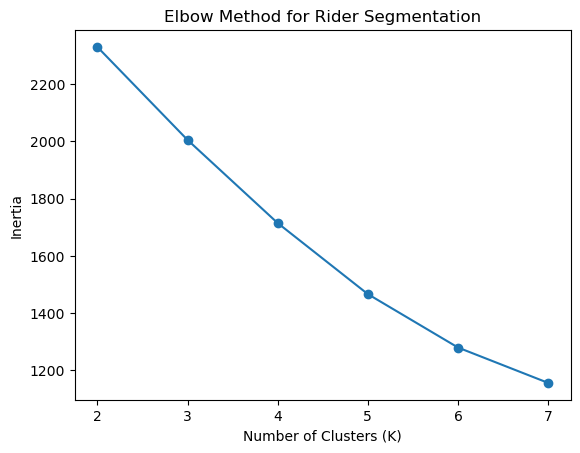

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

inertia = []
K_range = range(2, 8)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Rider Segmentation")
plt.show()

In [46]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rider_features_grouped["cluster"] = kmeans.fit_predict(X_scaled)

c:\Users\conta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [47]:
cluster_profile = (
    rider_features_grouped.groupby("cluster")
    .agg(
        riders=("rider_id", "count"),
        avg_rides_per_day=("rides_per_day", "mean"),
        avg_rides_per_hour=("rides_per_hour", "mean"),
        avg_idle_rate=("idle_time_rate", "mean"),
        avg_on_time_rate=("on_time_rides_percentage", "mean"),
        avg_cancel_rate=("cancel_rate", "mean"),
        avg_rating=("customer_rating", "mean"),
        avg_trip_distance=("avg_trip_distance", "mean"),
        avg_net_earnings=("net_earnings", "mean"),
    )
    .round(2)
)

print(
    tabulate(
        cluster_profile,
        headers="keys",
        tablefmt="fancy_grid",
        stralign="center",
    )
)

╒═══════════╤══════════╤═════════════════════╤══════════════════════╤═════════════════╤════════════════════╤═══════════════════╤══════════════╤═════════════════════╤════════════════════╕
│   cluster │   riders │   avg_rides_per_day │   avg_rides_per_hour │   avg_idle_rate │   avg_on_time_rate │   avg_cancel_rate │   avg_rating │   avg_trip_distance │   avg_net_earnings │
╞═══════════╪══════════╪═════════════════════╪══════════════════════╪═════════════════╪════════════════════╪═══════════════════╪══════════════╪═════════════════════╪════════════════════╡
│         0 │      232 │               12.68 │                 2.48 │           16.18 │              74.24 │             10.56 │         4.4  │                5.24 │            78787.7 │
├───────────┼──────────┼─────────────────────┼──────────────────────┼─────────────────┼────────────────────┼───────────────────┼──────────────┼─────────────────────┼────────────────────┤
│         1 │       33 │                7.95 │                 2.

**Cluster 0 – High-Output Regular Riders**
Largest and most productive group. They complete the highest rides per day with good hourly efficiency, moderate idle time, acceptable cancellation rates, and strong net earnings. These are consistent, reliable full-time riders.

**Cluster 1 – Low-Engagement / Part-Time Riders**
Smallest group with the fewest rides per day, lowest efficiency, highest idle time, and highest cancellation rate. Earnings are significantly lower. These riders likely work limited hours or irregular schedules.

**Cluster 2 – Average Consistent Riders**
Mid-performing group balancing work and efficiency. Ride volume and earnings are moderate, idle and cancellation rates sit between Clusters 0 and 1. Represents stable riders who are active but not maximizing output.